In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

from gradvi.priors.normal_means import NormalMeansFromPosterior as NMFromPost
from gradvi.priors.normal_means import NormalMeans
from gradvi.priors import Ash

from gradvi.tests import toy_priors

In [2]:
def sample_normal_means(mean, var):
    p = mean.shape[0]
    if not isinstance(var, np.ndarray):
        var = np.repeat(var, p)
    y = np.random.multivariate_normal(mean, np.diag(var))
    return y


def get_nm_data(prior, p = 500):
    np.random.seed(100)
    s2  = 1.2**2
    #dj = np.square(np.random.normal(1, 0.5, size = n)) * n
    dj  = np.ones(p) * p 
    b   = prior.sample(p, seed = 200, scale = s2) 
    sj2 = s2 / dj
    z   = sample_normal_means(b, sj2)
    return z, sj2, s2, dj

In [3]:
priors = toy_priors.get_all(k = 10, scale = 10., sparsity = 0.3)

In [4]:
prior = priors[1]

b, sj2, s2, dj = get_nm_data(prior)
nm = NMFromPost(b, prior, sj2, scale = s2, d = dj, method = 'fssi-cubic', ngrid = 500)
lz, lz_bd, lz_wd, lz_s2d = nm.penalty_operator(jac = True)

In [5]:
nm2 = NormalMeans.create(nm.response, prior, sj2, scale = s2, d = dj)
np.allclose(nm2.penalty_operator(jac = False), lz, atol = 1e-4, rtol = 1e-8)

True

In [7]:
np.sum(lz)

1022.7017299992135

In [10]:
eps = 1e-8
d2 = np.zeros_like(lz_bd)
indxlim = lz_bd.shape[0]
for i in range(indxlim):
    b_eps = b.copy()
    b_eps[i] += eps
    nm_eps = NMFromPost(b_eps, prior, sj2, scale = s2, d = dj, method = 'fssi-cubic', ngrid = 500)
    lz_eps = nm_eps.penalty_operator(jac = False)
    d2[i] = (np.sum(lz_eps) - np.sum(lz)) / eps
np.allclose(lz_bd, d2, atol = 1e-4, rtol = 1e-8)
#print(d2[:indxlim])
#print(lz_bd[:indxlim])

True

In [17]:
for i in range(prior.k):
    wkeps     = prior.w.copy()
    wkeps[i] += eps
    prior_eps = toy_priors.get_from_same_class(prior, wkeps)
    nm_eps    = NMFromPost(b, prior_eps, sj2, scale = s2, d = dj, method = 'fssi-cubic', ngrid = 500)
    lz_eps    = nm_eps.penalty_operator(jac = False)
    d1 = lz_wd[:, i]
    d2 = (lz_eps - lz) / eps
    print(np.allclose(d1, d2, atol = 1e-4, rtol = 1e-8))

True
True
True
True
True
True
True
True
True
True


In [16]:
(np.sum(lz_eps) - np.sum(lz)) / eps

-184.31765056448057

In [19]:
np.sum(lz_eps) - np.sum(lz)

-1.8431765056448057e-06

In [18]:
np.sum(lz)

1022.7017299992135

In [20]:
b

array([ 2.12225924e+00,  5.32467440e-02, -8.84511436e-01,  5.05609906e-01,
        1.13926322e+00, -9.64211843e-02, -3.01934728e-01, -9.16856734e+00,
        3.49718057e-01,  3.27649900e+00,  4.50684087e+00, -3.21156217e+00,
       -2.90512389e+00, -6.07277167e-01, -1.66771137e+01, -2.95954149e-02,
        1.40282918e+00, -7.08139271e-02, -1.92919761e-05,  1.30206943e+01,
       -3.52081987e+00, -1.28879643e+00, -1.00573905e+01, -6.18739101e-01,
       -5.66024207e-01, -1.27024791e+00,  9.60519460e-01, -7.94001002e-01,
       -1.59242363e+00, -8.33522543e-02,  3.85279888e+00,  1.22248728e+00,
       -9.43944928e-01,  9.27381268e-02,  2.27378191e-03,  7.90800620e-01,
        6.97817081e+00, -1.28775204e-02,  7.71990908e-01,  5.97135642e-02,
       -6.81600833e-03,  4.22210229e-02, -2.58549677e+00, -1.11077955e+00,
       -2.90797835e-01,  4.54607681e-02, -1.58434738e+00,  3.78563435e-01,
       -4.31579331e-02, -6.11640376e+00,  1.53665412e+00, -9.98825712e+00,
       -6.77983529e-03,  

In [21]:
b_eps

array([ 2.12225924e+00,  5.32467440e-02, -8.84511436e-01,  5.05609906e-01,
        1.13926322e+00, -9.64211843e-02, -3.01934728e-01, -9.16856734e+00,
        3.49718057e-01,  3.27649900e+00,  4.50684087e+00, -3.21156217e+00,
       -2.90512389e+00, -6.07277167e-01, -1.66771137e+01, -2.95954149e-02,
        1.40282918e+00, -7.08139271e-02, -1.92919761e-05,  1.30206943e+01,
       -3.52081987e+00, -1.28879643e+00, -1.00573905e+01, -6.18739101e-01,
       -5.66024207e-01, -1.27024791e+00,  9.60519460e-01, -7.94001002e-01,
       -1.59242363e+00, -8.33522543e-02,  3.85279888e+00,  1.22248728e+00,
       -9.43944928e-01,  9.27381268e-02,  2.27378191e-03,  7.90800620e-01,
        6.97817081e+00, -1.28775204e-02,  7.71990908e-01,  5.97135642e-02,
       -6.81600833e-03,  4.22210229e-02, -2.58549677e+00, -1.11077955e+00,
       -2.90797835e-01,  4.54607681e-02, -1.58434738e+00,  3.78563435e-01,
       -4.31579331e-02, -6.11640376e+00,  1.53665412e+00, -9.98825712e+00,
       -6.77983529e-03,  

In [3]:
p = 500
k = 4
sparsity = 0.9
strue = 1.0
s2true = np.square(strue)

np.random.seed(100)
wtrue, sk = initialize_ash_prior(k, sparsity = sparsity, scale = 10.0)
#sk = np.logspace(-1, k-2, k)
btrue = sample_mixgauss(wtrue, sk, p)
y = NM_sample(btrue, std = strue)
print ("Standard deviation of prior mixture components: "
       + ', '.join([f"{x:.3f}" for x in sk])
      )
print ()

Standard deviation of prior mixture components: 0.000, 0.778, 2.162, 4.623



In [4]:
dj = np.ones(p)
s2 = np.square(strue)
prior = Ash(sk, wk = wtrue)
nmash = NormalMeans.create(y, prior, s2 / dj, scale = s2, d = dj)
#nmash = NormalMeansASHScaled(y, strue, wtrue, sk, d = dj)
qphi, qmu, qvar = nmash.posterior()

bpostmean = np.sum(qphi * qmu, axis = 1)
wpost = np.sum(qphi, axis = 0)
wpost = wpost / np.sum(wpost)

In [5]:
bconst = bpostmean.copy()

nmpost = NMFromPost(bconst, prior, s2 / dj, scale = s2, method = 'hybr', debug = True)
theta_newraph = nmpost.response
b_newraph = get_postmean(theta_newraph, prior, s2 / dj, scale = s2, d = dj)

2022-04-20 21:12:01,706 | gradvi.priors.normal_means.nm_from_posterior | DEBUG | Inverting using method hybr
2022-04-20 21:12:03,120 | gradvi.priors.normal_means.nm_from_posterior | DEBUG | The solution converged.


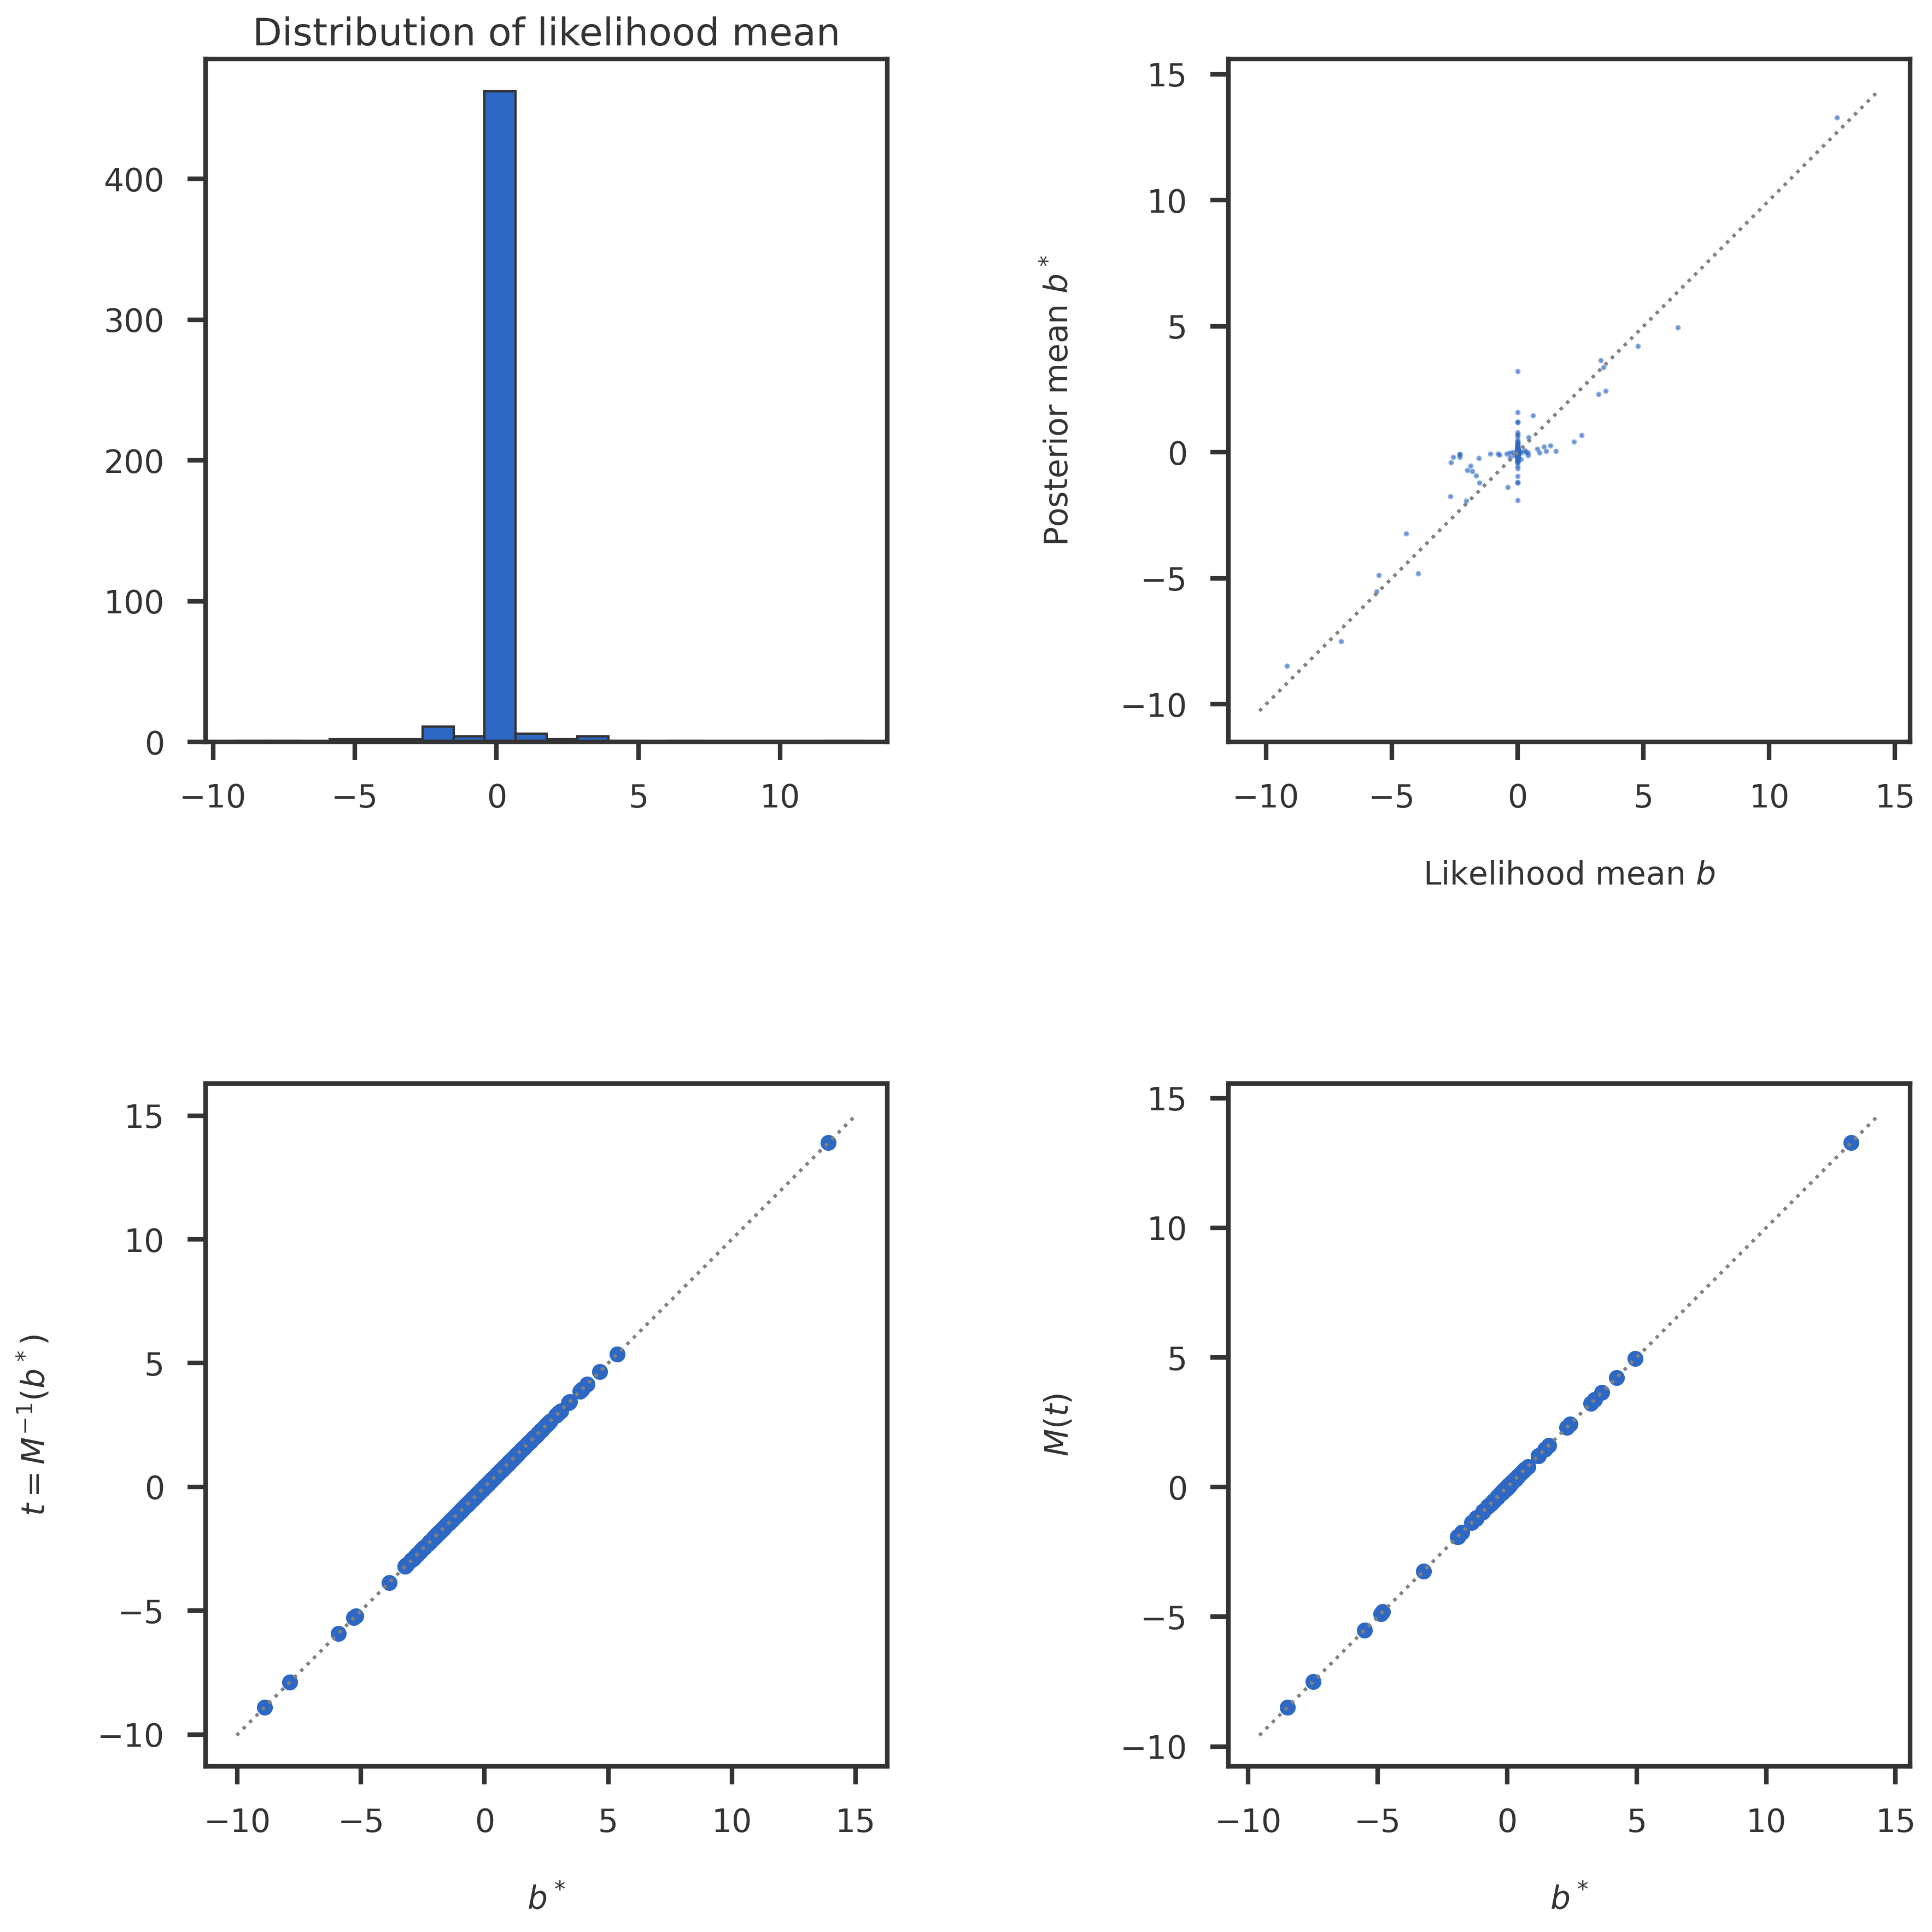

In [6]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.hist(btrue)
ax1.set_title("Distribution of likelihood mean")

ax2.scatter(btrue, bpostmean, s=2, alpha = 0.5)
mpl_utils.plot_diag(ax2)
ax2.set_xlabel(r"Likelihood mean $b$")
ax2.set_ylabel(r"Posterior mean $b^*$")
#ax1.hist(mean)

ax3.scatter(y, theta_newraph)
#ax3.scatter(theta_newraph, bconst)
mpl_utils.plot_diag(ax3)
ax3.set_xlabel(r"$b^*$")
ax3.set_ylabel(r"$t = M^{-1}(b^*)$")

ax4.scatter(bconst, b_newraph)
mpl_utils.plot_diag(ax4)
ax4.set_xlabel(r"$b^*$")
#ax4.set_ylabel(r"$M(M^{-1}(b^*))$")
ax4.set_ylabel(r"$M(t)$")

plt.tight_layout()
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [7]:
t_powell = NMFromPost(bconst, prior, s2 / dj, scale = s2, method = 'hybr').response

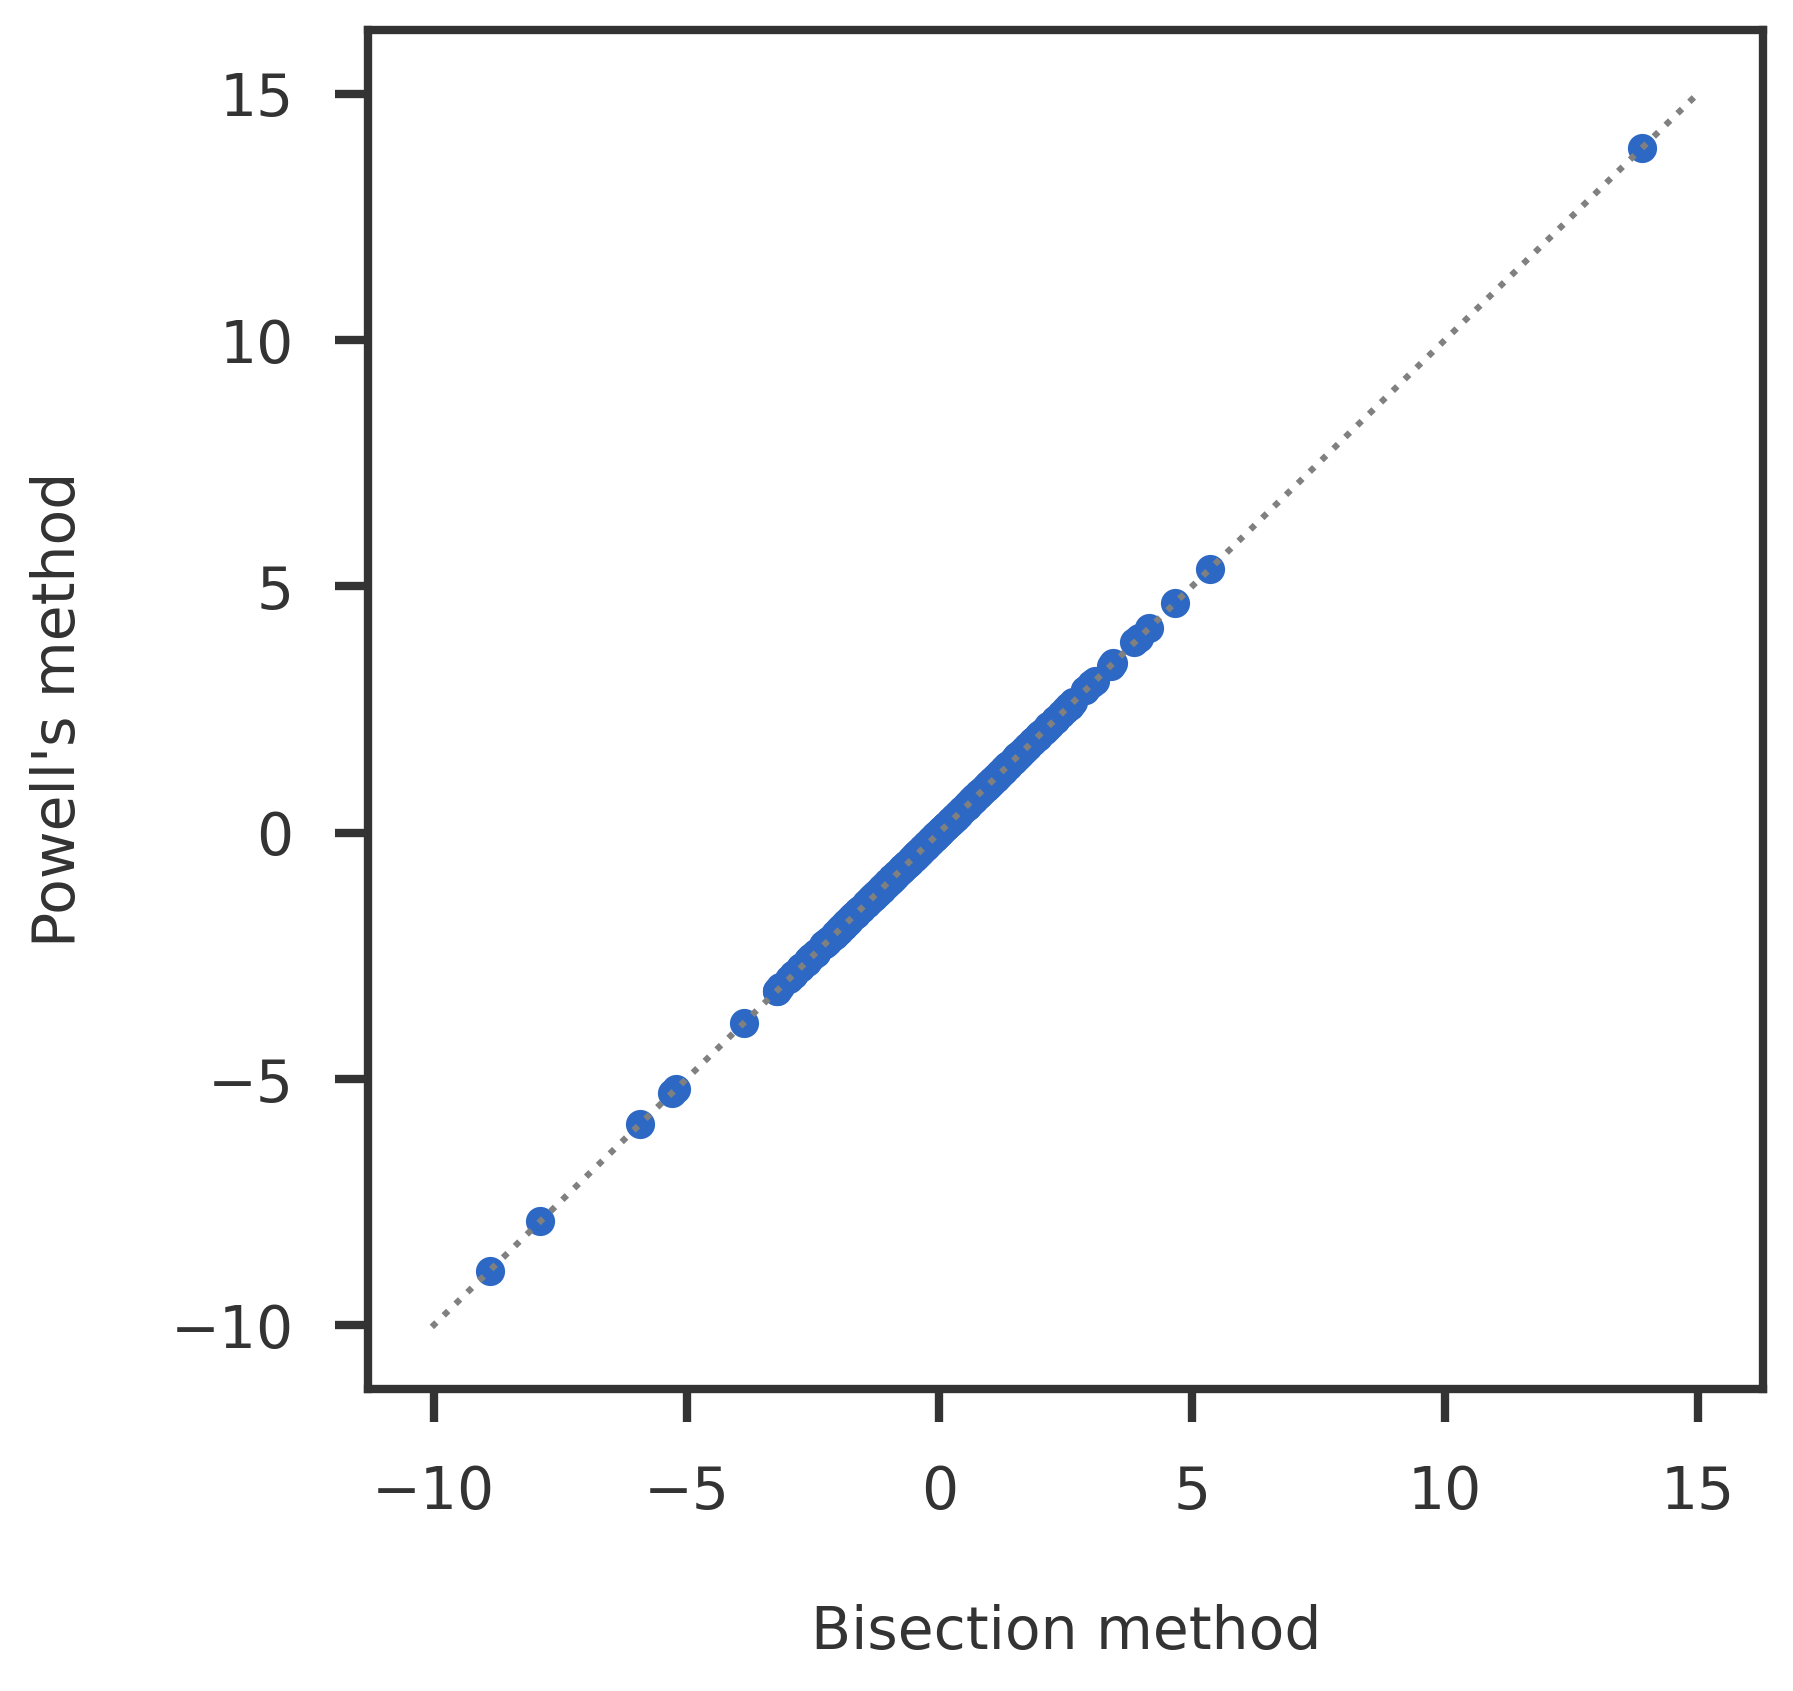

In [8]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.scatter(theta_newraph, t_powell)
mpl_utils.plot_diag(ax1)
ax1.set_xlabel ("Bisection method")
ax1.set_ylabel ("Powell's method")
plt.show()

In [11]:
%%timeit
t_fssi1 = NMFromPost(bconst, prior, s2 / dj, scale = s2, method = 'fssi-linear').response

1.22 ms ± 5.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%%timeit
t_fssi3 = NMFromPost(bconst, prior, s2 / dj, scale = s2, method = 'fssi-cubic').response

1.29 ms ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
t_fssi1 = NMFromPost(bconst, prior, s2 / dj, scale = s2, method = 'fssi-linear').response
t_fssi3 = NMFromPost(bconst, prior, s2 / dj, scale = s2, method = 'fssi-cubic').response

b_fssi1 = get_postmean(t_fssi1, prior, s2 / dj, scale = s2, d = dj)
b_fssi3 = get_postmean(t_fssi3, prior, s2 / dj, scale = s2, d = dj)

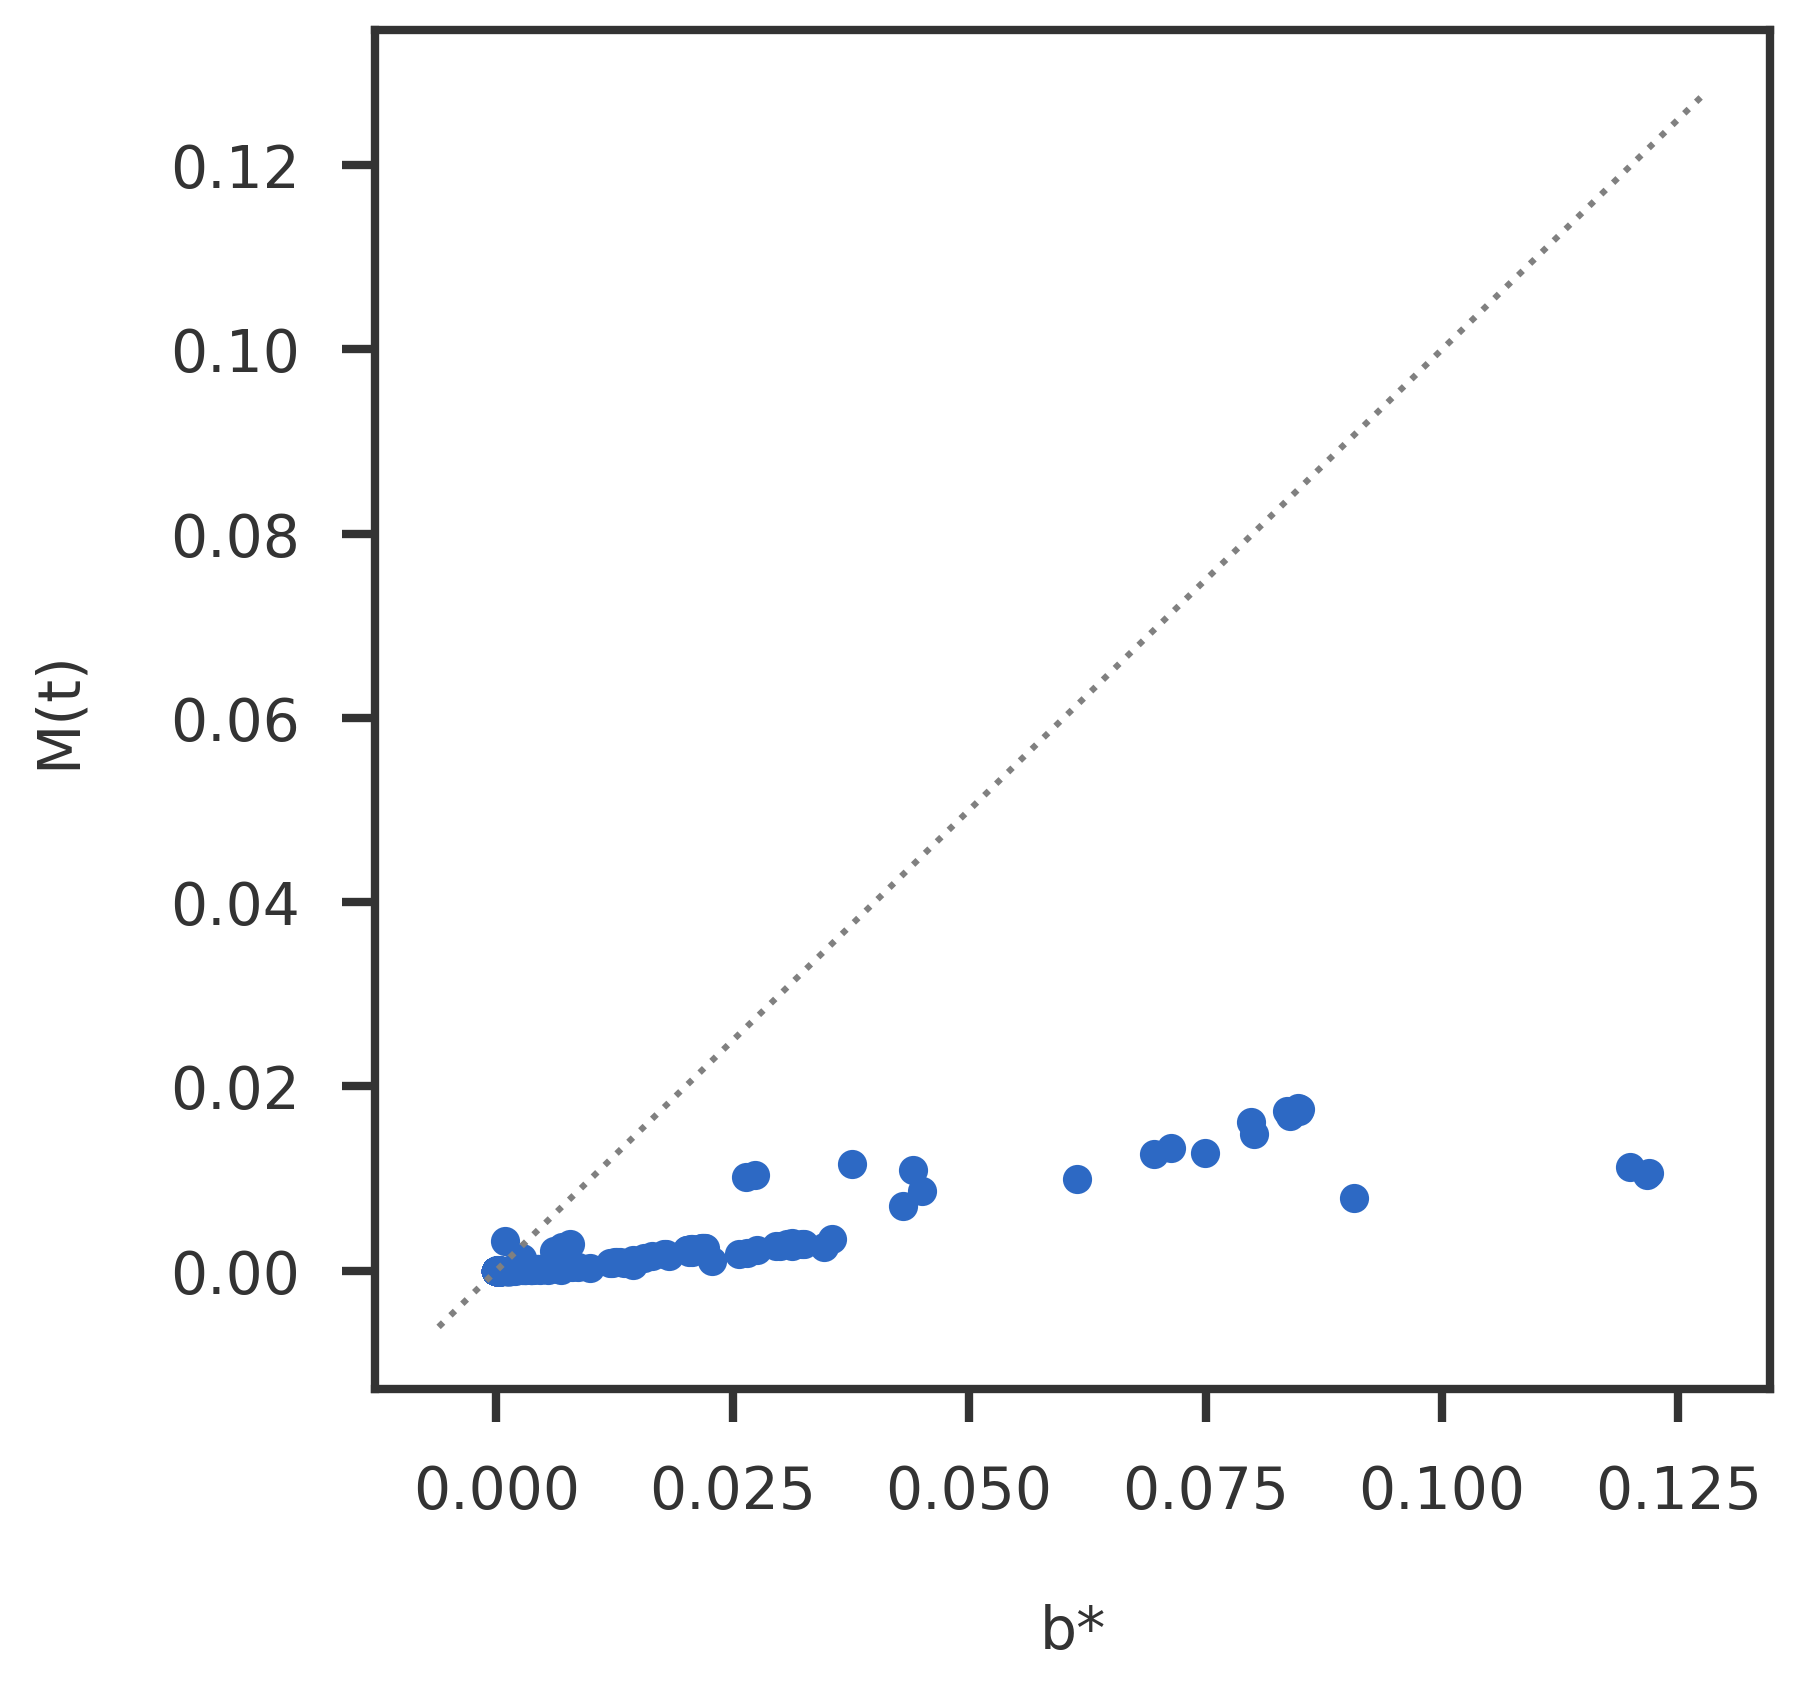

In [10]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.scatter(np.abs(b_fssi1 - bconst), np.abs(b_fssi3 - bconst))
#ax1.scatter(bconst, b_fssi3)
mpl_utils.plot_diag(ax1)
ax1.set_xlabel ("b*")
ax1.set_ylabel ("M(t)")
plt.show()